/var/folders/_4/h9l9tmt125scs2rqlyp5107c0000gn/T/ipykernel_90717/3900653065.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/_4/h9l9tmt125scs2rqlyp5107c0000gn/T/ipykernel_90717/3900653065.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/_4/h9l9tmt125scs2rqlyp5107c0000gn/T/ipykernel_90717/3900653065.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/_4/h9l9tmt125scs2rqlyp5107c0000gn/T/ipykernel_90717/3900653065.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

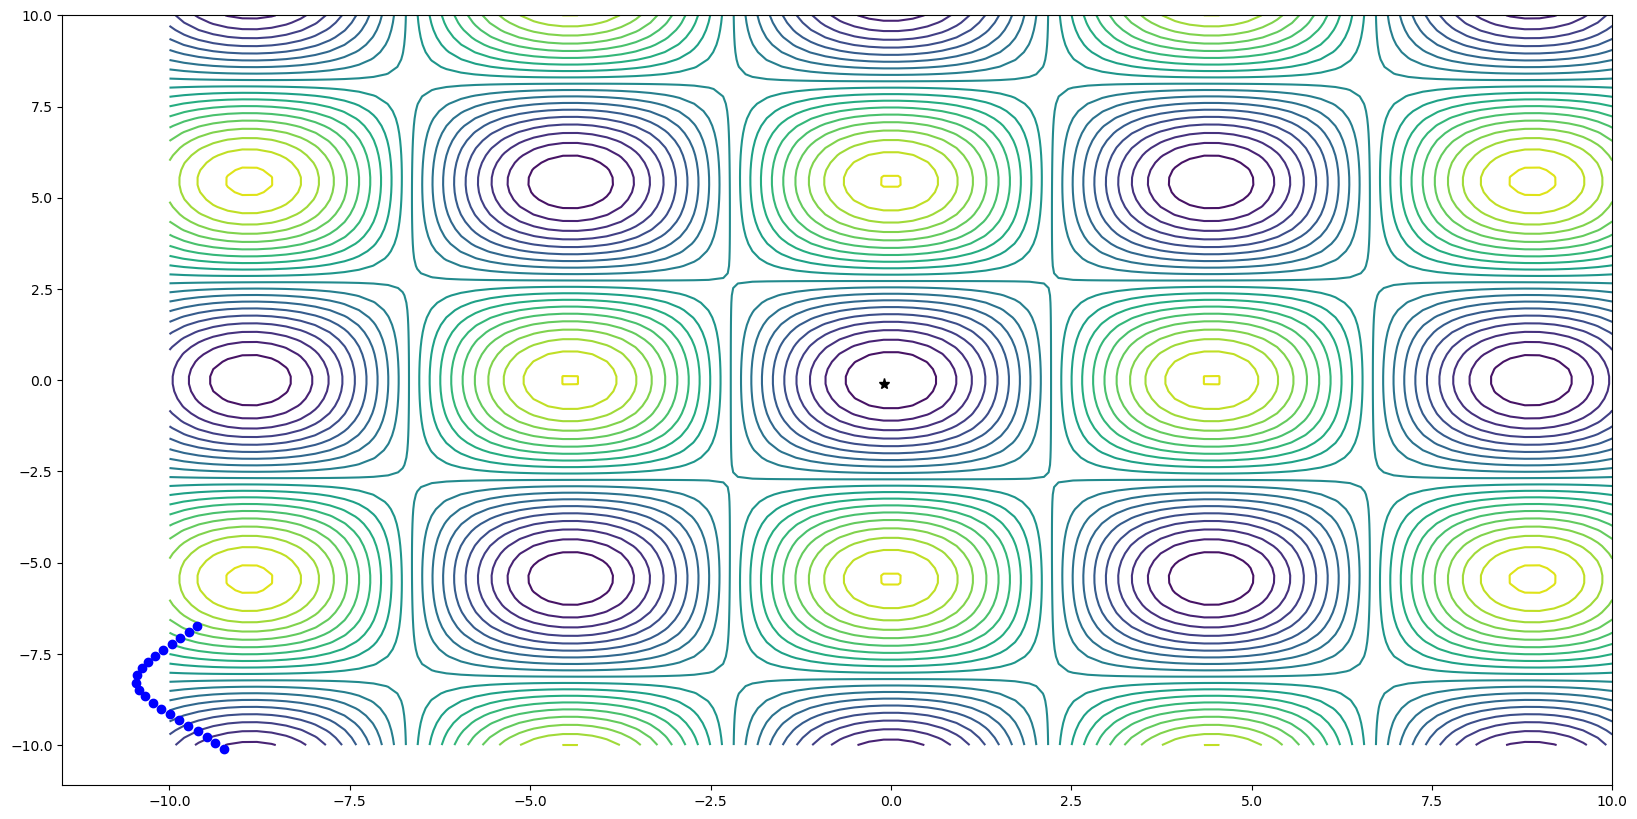

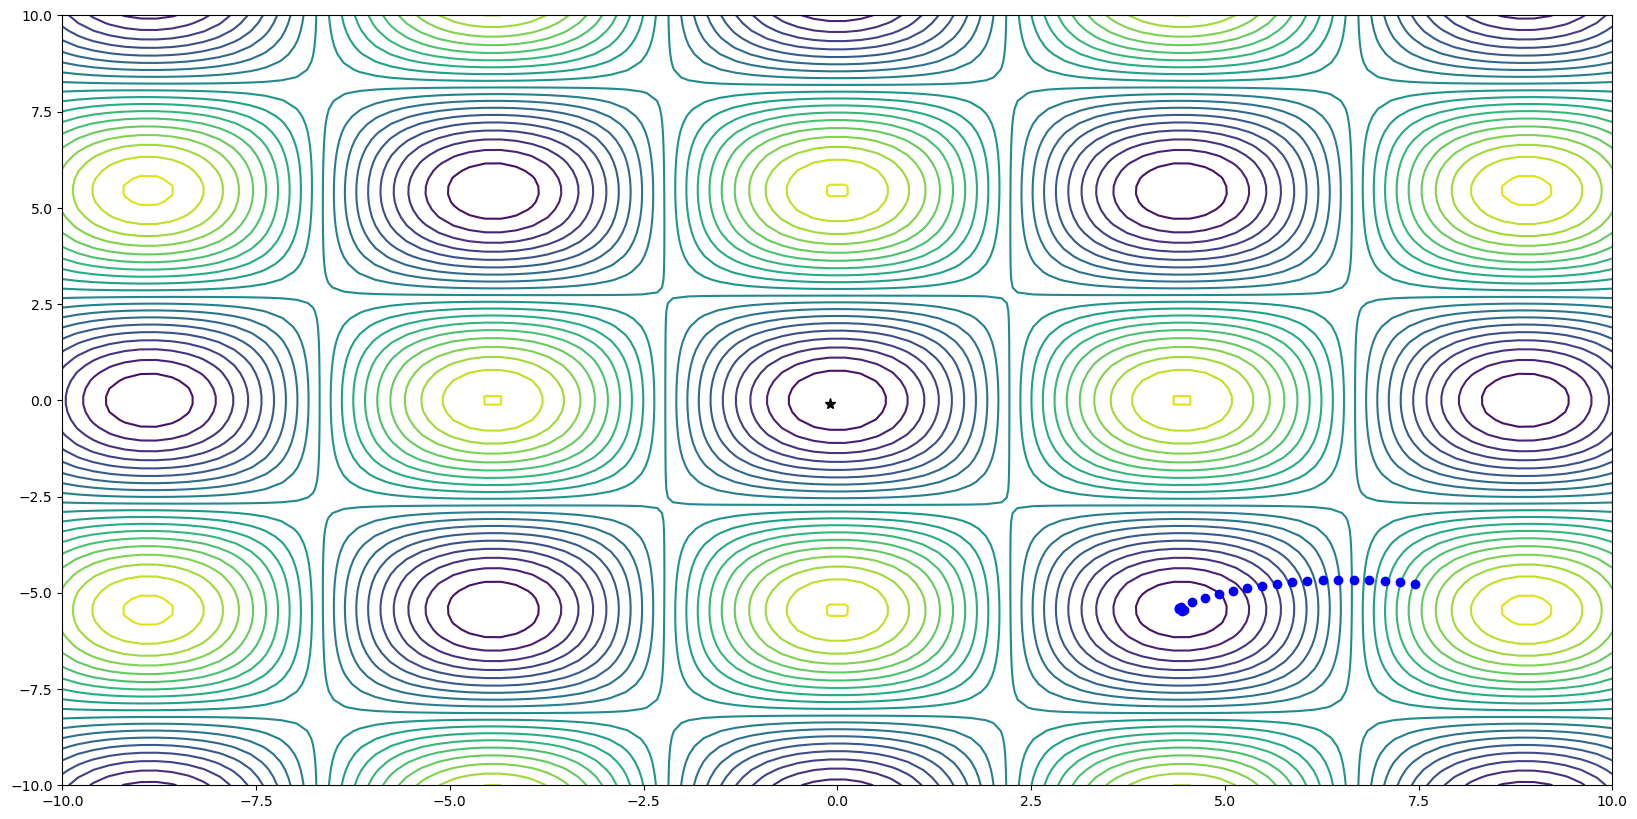

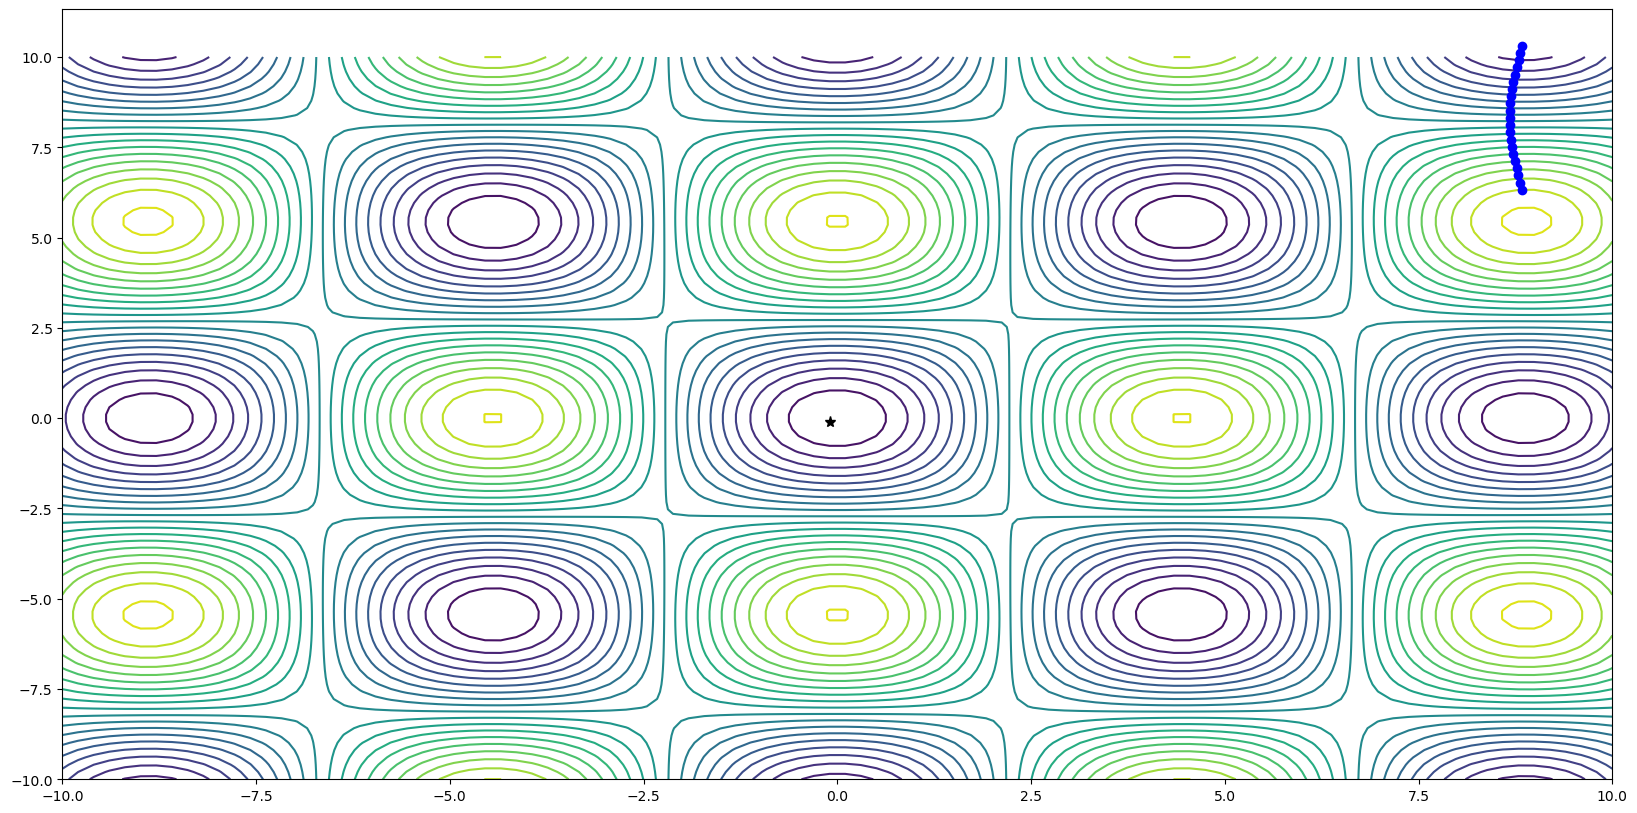

In [2]:
# All libraries 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import cos
import pandas as pd
import numpy as np
import os
import glob
from PIL import Image

# Gierwank Function
def f(x, y):
    return (x**2 + y**2)/4000 - np.cos(x/np.sqrt(2)) * np.cos(y/np.sqrt(3)) + 1

v_func = np.vectorize(f)

# Compute and plot the function in 3D within [-10,10]x[-10,10]
x, y = np.array(np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100)))
z = f(x, y)

# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# H - Value of the finite difference approximaion
h = 10**(-6) 

# Gradient - 
gradient = lambda x, y: np.array([ f(x+h, y)-f(x, y) , f(x, y+h)-f(x, y) ])
# Grandnorm - 
gradnorm = lambda x, y: np.sum(gradient(x, y)**2)**(1/2)
# Calcdir
calcdir = lambda x, y: -gradient(x, y) / gradnorm(x, y)

# Alpha -
alpha = 0.2
# Ro - 
ro = 0.9
# Mu - 
mu = 10**(-5)

# Creating DataFrame to store points location
df = pd.DataFrame(columns=['index','x','y','z','Gradient'])

for i in range(1,4):
    # Starting conditions
    x0 = np.random.uniform(-10,10)
    y0 = np.random.uniform(-10,10)

    fig, ax = plt.subplots(1,figsize=(20,10))  

    ax.contour(x, y, v_func(x, y), levels=20)
    ax.plot([x_min], [y_min], marker='*', markersize=8, color="black")
    plt.plot(x0, y0,'bo')

    for j in range(0,20):
        # Gradient - presesnt direction
        sdir = calcdir(x0, y0) 
        #plt.arrow(x0, y0, 0.2*sdir[0], 0.2*sdir[1], width = 0.05) # present the direction on the plot

        # Backtracking algorithm - Reducing stepsize if necessary
        step = alpha
        while True:
            if v_func(x0 + step*sdir[0], y0 + step*sdir[1]) <= v_func(x0, y0) + mu*step*np.dot(gradient(x0, y0),sdir):
                    break
            step = ro*step

        # Creating new row in dataframe
        new_row = {'index':i, 'x':x0, 'y':y0,'z':float(v_func(x0,y0)), 'Gradient':np.dot(gradient(x0, y0),sdir)}
        #append row to the dataframe
        df = df.append(new_row, ignore_index=True)  

        # Path to save the plots 
        path = '/Users/daniellilla/Desktop/Optimisation_Classes/All_plots/GradientBased_plots/'
        files = os.listdir(path)
        plt.savefig(path+files[i]+'/'+f'plot{j}.png', dpi = 300)
        
        # Calculate next point coordinates
        plt.plot(x0 + step*sdir[0], y0 + step*sdir[1],'bo')
        # Update point cooridnates
        x0 = x0 + step*sdir[0] 
        y0 = y0 + step*sdir[1] 

for i in range(1,4):
    # Taking all png files downloaded
    extension = 'png'
    os.chdir(path+files[i])
    all_bay_plots = glob.glob('*.{}'.format(extension))

    fp_out = f'/Users/daniellilla/Desktop/Optimisation_Classes/All_gifs/GradientBased_plots/Gif{i}.gif'

    imgs = (Image.open(picture) for picture in sorted(all_bay_plots))
    img = next(imgs)  # extract first image from iterator
    img.save(fp=fp_out, format='GIF', append_images=imgs,
            save_all=True, duration=200, loop=0)

# Taking care of dataframe results 
df1 = df.iloc[:20,:] 
df1['Result'] = 'First'
df2= df.iloc[20:40,:]
df2['Result'] ='Second'
df3 =df.iloc[40:,:]
df3['Result'] = 'Third'
frames = [df1, df2, df3]
df = pd.concat(frames)
df.drop(columns=['index'])
#plt.show()